In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rcParams["figure.figsize"] = (14,6)

In [9]:
confirmed_us = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
deaths_us = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
confirmed_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [10]:
confirmed_ar = confirmed_global[confirmed_global["Country/Region"] == "Argentina"].iloc[:,4:].T
recovered_ar = recovered_global[recovered_global["Country/Region"] == "Argentina"].iloc[:,4:].T
deaths_ar = deaths_global[deaths_global["Country/Region"] == "Argentina"].iloc[:,4:].T

In [11]:
confirmed_ar.columns = ["C"]
recovered_ar.columns = ["R"]
deaths_ar.columns = ["D"]

In [12]:
idx = pd.to_datetime(confirmed_ar.index)
data_ar = pd.DataFrame(data={"Total_Confirmed":confirmed_ar.C, "R":recovered_ar.R, "D":deaths_ar.D}, index=idx)

In [13]:
data_ar["I"] = data_ar["Total_Confirmed"] - data_ar["R"] - data_ar["D"]
data_ar = data_ar[["I", "R", "D", "Total_Confirmed"]]
data_ar = data_ar[data_ar.I > 0]
data_ar

,I,R,D,Total_Confirmed
2020-03-03,1,0,0,1
2020-03-04,1,0,0,1
2020-03-05,1,0,0,1
2020-03-06,2,0,0,2
2020-03-07,8,0,0,8
...,...,...,...,...
2020-06-05,14317,6088,632,21037
2020-06-06,15192,6180,648,22020
2020-06-07,15221,6909,664,22794
2020-06-08,15622,7305,693,23620


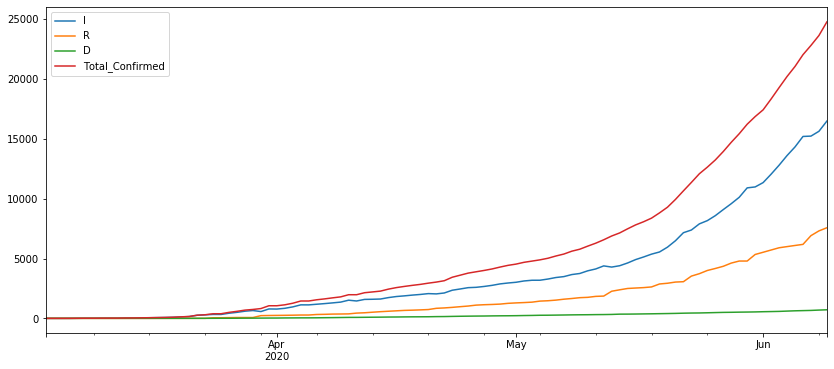

In [14]:
data_ar.plot()

In [15]:
data_ar = data_ar.reset_index()
data_ar = data_ar.rename(columns={"index": "date"})
data_ar.to_csv("../data/obs_arg.csv", index=False)